# Data Transformation: Reshaping Data

Data transformation, especially reshaping data, is a crucial step in the data wrangling process for several reasons:

1. Data Compatibility: Data often comes from various sources and in different formats. Reshaping allows you to make your data compatible with your analysis or visualization tools. For example, transforming data into a specific structure may be required for creating visualizations or feeding it into machine learning algorithms.

2. Feature Engineering: Reshaping data can involve creating new features or variables from existing ones. Feature engineering is essential for improving the performance of machine learning models. By reshaping data, you can extract meaningful information and relationships between variables.

3. Data Aggregation: Reshaping data can involve aggregating data, such as summarizing daily data into monthly or yearly summaries. This can be crucial for creating meaningful insights or reducing the size of large datasets for analysis.

4. Normalization: Data often needs to be normalized or standardized to have consistent scales. This is important for many machine learning algorithms that are sensitive to the scale of input features. Reshaping data to achieve this can help improve model performance.

5. Handling Missing Data: Reshaping can involve filling in or interpolating missing data. Proper handling of missing data is crucial to avoid bias and ensure accurate analysis and modeling.

6. Data Reduction: Reshaping can help in reducing the dimensionality of data by summarizing information. For example, you can pivot a table to create a summary table, which can be easier to work with and understand.

7. Data Merging: Reshaping is often used when combining data from different sources. It ensures that data can be effectively merged based on common keys or attributes.

8. Time Series Analysis: For time series data, reshaping is crucial to apply time-based operations, such as lagging, differencing, and rolling calculations.


## Simple Data Converstion


In [ ]:
import pandas as pd
num_series = pd.Series([3, 7, 11, 22, 8])
num_series

num_series prints out the contents and the dtype. Lets convert it to a float using numpy

In [ ]:
import numpy as np
num_series.astype(np.float64)

## Data Type Conversion

### Converting to Numeric Data Type
Converting data to the numeric data type is useful when dealing with numerical values that are currently stored as strings or other non-numeric formats.    Python and Pandas provide several methods to perform these types of conversion so we will only vist a few.

Assume for some reason the 'Bedrooms' column has string values like "one", "two", etc. We can convert these string values to numeric using a python mapping dictionary.  Recall how a dictionary is key value pairs.  For example, 'one' maps to 1, 'two' maps to 2, etc.

We use the map() method on the 'Bedrooms' column and pass the bedroom_mapping dictionary as an argument. This maps the string values to their corresponding numeric values, converting the 'Bedrooms' column to numeric.

Btw we can check the data types of the converted columns using print(df.dtypes).

In [6]:
import pandas as pd

# Create a dictionary data with three keys: 'Address', 'Bedrooms', and 'Price'.Each key corresponds to a list of values.

data = {
    'Address': ['123 Main St', '456 Elm St', '789 Oak St', '321 Pine St', '654 Maple St'],
    'Bedrooms': ['three', 'four', 'two', 'three', 'three'],
    'Price': ['$500,000', '$600,000', '$450,000', '$700,000', '$550,000']
}

# Create our dataframe
df = pd.DataFrame(data)
print('\n',df)

# use the .dtypes attribute of df to see our column datatypes. This doesn't require a method call (you don't use parentheses)
print('\n Data types:\n',df.dtypes)

# Create a mapping dictionary for converting string values to numeric
bedroom_mapping = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}

# Convert 'Bedrooms' column to numeric using map
df['Bedrooms'] = df['Bedrooms'].map(bedroom_mapping)

# Check the data types of the converted columns
print('\n',df)

# Convert 'Price' column to numeric by removing dollar signs and commas
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Check the data types of the converted columns
print('\n',df)
print('\n Notice our new data types:\n',df.dtypes)



         Address Bedrooms     Price
0   123 Main St    three  $500,000
1    456 Elm St     four  $600,000
2    789 Oak St      two  $450,000
3   321 Pine St    three  $700,000
4  654 Maple St    three  $550,000

 Data types:
 Address     object
Bedrooms    object
Price       object
dtype: object

         Address  Bedrooms     Price
0   123 Main St         3  $500,000
1    456 Elm St         4  $600,000
2    789 Oak St         2  $450,000
3   321 Pine St         3  $700,000
4  654 Maple St         3  $550,000

         Address  Bedrooms     Price
0   123 Main St         3  500000.0
1    456 Elm St         4  600000.0
2    789 Oak St         2  450000.0
3   321 Pine St         3  700000.0
4  654 Maple St         3  550000.0

 Notice our new data types:
 Address      object
Bedrooms      int64
Price       float64
dtype: object


<ipython-input-6-26ead5d8f7a1>:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)


We also need to convert our 'Price' column to the numeric data type. First we removed the dollar signs and commas using the str.replace() method. Then, we use the astype(float) method to convert the column to float data type.

## Date and DateTime Conversions

Converting data to the DateTime data type is essential when working with date and time values. Python and Pandas provide functions and methods to facilitate this conversion and we will visit a few.

Lets create a dataframe and see some examples.

In [8]:
import pandas as pd

# Create a DataFrame with DateTime data
data = {
    'Address': ['123 Main St', '456 Elm St', '789 Oak St'],
    'SaleDate': ['05/15/2021', '2022-01-10', '09/20/2020'],
    'YearBuilt': ['2010-06', '2005-08', '2018'],
    'LastUpdateDate': ['2022-06-28 09:30:00', '2022-06-30 12:45:00', '2022-06-29 16:20:00']
}

df = pd.DataFrame(data)
print(df)
# Call the .dtypes attribute to review df's data types
print('\n Data types:\n',df.dtypes)



       Address    SaleDate YearBuilt       LastUpdateDate
0  123 Main St  05/15/2021   2010-06  2022-06-28 09:30:00
1   456 Elm St  2022-01-10   2005-08  2022-06-30 12:45:00
2   789 Oak St  09/20/2020      2018  2022-06-29 16:20:00

 Data types:
 Address           object
SaleDate          object
YearBuilt         object
LastUpdateDate    object
dtype: object


### Quick Tip! Object Types

The dictionaries we created thus far (data) contais mostly string vlaues such as address. So why doesn't Pandas store it as a string?  In Pandas, columns containing strings are typically stored as 'object' dtype because Pandas relies on the NumPy library, which does not have a dedicated string type. Instead, Pandas uses NumPy's narray and object type which can hold various Python objects, including strings (there's a more detailed expliaion but its beyond my capabilityes to expons so at this point in my (part-time) coding career :) )

### Convert Object to DateTime
To convert the 'SaleDate' column from Object to the DateTime data type, we can use Pandas to_datetime() function without specifying a format. Pandas will infer the date format based on the values.

To convert the 'YearBuiltDate' column to the DateTime data type, we use pd.to_datetime() with the format='%Y-%m' argument. This specifies that the format of the values is year-month ('YYYY-MM').

To remove the timestamp from the 'LastUpdateDateTime' column, we use pd.to_datetime() to convert the column to DateTime format, and then we apply .dt.date to extract only the date part and discard the time.

Finally, we check the data types of the columns using print(df.dtypes) and display the DataFrame using print(df).

In [ ]:
# Convert 'SaleDate' column to DateTime
df['SaleDate'] = pd.to_datetime(df['SaleDate'])
print('\n SaleDate Converted \n',df)

# Convert 'YearBuiltDate' column to DateTime with custom format
df['YearBuilt'] = pd.to_datetime(df['YearBuilt'], format='%Y-%m')
print('\n YearBuilt Converted \n',df)

# Remove timestamp from 'LastUpdateDateTime' column
df['LastUpdateDate'] = pd.to_datetime(df['LastUpdateDate']).dt.date
print('\n LastUpdateDate Converted \n',df)

# Check the data types and display the DataFrame
print('\n',df.dtypes)
print('\n',df)


 Address                   object
SaleDate          datetime64[ns]
YearBuilt         datetime64[ns]
LastUpdateDate            object
dtype: object

 SaleDate Converted 
        Address   SaleDate  YearBuilt LastUpdateDate
0  123 Main St 2021-05-15 2010-06-01     2022-06-28
1   456 Elm St 2022-01-10 2005-08-01     2022-06-30
2   789 Oak St 2020-09-20 2018-01-01     2022-06-29

 YearBuilt Converted 
        Address   SaleDate  YearBuilt LastUpdateDate
0  123 Main St 2021-05-15 2010-06-01     2022-06-28
1   456 Elm St 2022-01-10 2005-08-01     2022-06-30
2   789 Oak St 2020-09-20 2018-01-01     2022-06-29

 LastUpdateDate Converted 
        Address   SaleDate  YearBuilt LastUpdateDate
0  123 Main St 2021-05-15 2010-06-01     2022-06-28
1   456 Elm St 2022-01-10 2005-08-01     2022-06-30
2   789 Oak St 2020-09-20 2018-01-01     2022-06-29

 Address                   object
SaleDate          datetime64[ns]
YearBuilt         datetime64[ns]
LastUpdateDate            object
dtype: object

   

You may have noticd that column YearBuild had example valuelike "2010-06" and you may have expected the follwing  line of code to preserve that

    pd.to_datetime(df['YearBuilt'], format='%Y-%m')

Instead the value changes to "2010-06-01".Why?  

In the context of datetime handling, the smallest unit of time measurement isn't a year or a month but a full date, which includes year, month, and day. When you convert a string to a datetime object, it standardizes the format to have all three components.

## Handling categorical variables and converting between data types.

Lets create a DataFrame df with house data, including columns for 'Address', 'Dwelling_Type', 'Dwelling_Condition', and 'Price'.

In this updated code example, we have  two categorical variables: 'Dwelling_Type' and 'Dwelling_Condition'.  The dataframe below has an 'Object' as a data type for these variables and we need to convert them to a categorical data type.  

To handle the categorical variable 'Dwelling_Type', we convert the data type of the 'Dwelling_Type' column to categorical using the astype() function. The argument 'category' specifies the desired data type.

To handle the categorical variable 'Dwelling_Condition', we convert the data type of the 'Dwelling_Condition' column to categorical using the pd.Categorical() constructor.

We also provide the categories argument to specify the order of the categories as ['Poor', 'Fair', 'Good', 'Excellent'] using the condition_categories list. Additionally, we set ordered=True to indicate that the categories have an intrinsic order.


In [ ]:
import pandas as pd

# Create a DataFrame with house data
data = {
    'Address': ['123 Main St', '456 Elm St', '789 Oak St', '321 Pine St', '654 Maple St'],
    'Dwelling_Type': ['Single Family', 'Apartment', 'Single Family', 'Condo', 'Single Family'],
    'Dwelling_Condition': ['Good', 'Fair', 'Excellent', 'Good', 'Poor'],
    'Price': [500000, 600000, 450000, 700000, 550000]
}

df = pd.DataFrame(data)
print(df)

# Check the data types of the columns prior to converting
print('\n','column types')
print(df[['Dwelling_Type', 'Dwelling_Condition']].dtypes)

# Convert the 'Dwelling_Type' column to categorical
df['Dwelling_Type'] = df['Dwelling_Type'].astype('category')

# Convert the 'Dwelling_Condition' column to categorical with specific order
condition_categories = ['Poor', 'Fair', 'Good', 'Excellent']
df['Dwelling_Condition'] = pd.Categorical(df['Dwelling_Condition'], categories=condition_categories, ordered=True)

# Check the data types of the categorical columns
print('\n',df[['Dwelling_Type', 'Dwelling_Condition']].dtypes)



        Address  Dwelling_Type Dwelling_Condition   Price
0   123 Main St  Single Family               Good  500000
1    456 Elm St      Apartment               Fair  600000
2    789 Oak St  Single Family          Excellent  450000
3   321 Pine St          Condo               Good  700000
4  654 Maple St  Single Family               Poor  550000

 column types
Dwelling_Type         object
Dwelling_Condition    object
dtype: object

 Dwelling_Type         category
Dwelling_Condition    category
dtype: object


## Pivoting Data
Lets pivot some smaple data using the pivot() function in Pandas.

To use the **pivot()** function on a datafraome we specify the column to use as the new index by setting index='Address', the column to use as the new columns using columns='Bedrooms', and the column to use as the new values using values='Price'. These arguments define the new structure of the pivoted DataFrame.

In [ ]:
import pandas as pd

# Create a DataFrame from the house price data
house_data = {
    'Address': ['123 Main St', '456 Elm St', '789 Oak St', '321 Pine St', '654 Maple St'],
    'Price': [500000, 600000, 450000, 700000, 550000],
    'Bedrooms': [3, 4, 2, 3, 3],
    'Bathrooms': [2, 2.5, 1.5, 3, 2]
}

# Lets see how it looks prior to the pivot
print("\n Before the Pivot")
print(house_data)

df = pd.DataFrame(house_data)
print(df)

# Pivot the DataFrame
pivot_df = df.pivot(index='Address', columns='Bedrooms', values='Price')
print("\n Before the Pivot")
print(pivot_df)


 Before the Pivot
{'Address': ['123 Main St', '456 Elm St', '789 Oak St', '321 Pine St', '654 Maple St'], 'Price': [500000, 600000, 450000, 700000, 550000], 'Bedrooms': [3, 4, 2, 3, 3], 'Bathrooms': [2, 2.5, 1.5, 3, 2]}
        Address   Price  Bedrooms  Bathrooms
0   123 Main St  500000         3        2.0
1    456 Elm St  600000         4        2.5
2    789 Oak St  450000         2        1.5
3   321 Pine St  700000         3        3.0
4  654 Maple St  550000         3        2.0

 Before the Pivot
Bedrooms             2         3         4
Address                                   
123 Main St        NaN  500000.0       NaN
321 Pine St        NaN  700000.0       NaN
456 Elm St         NaN       NaN  600000.0
654 Maple St       NaN  550000.0       NaN
789 Oak St    450000.0       NaN       NaN


The pivoted DataFrame pivot_df rearranges the data, with the unique values from the 'Bedrooms' column becoming the new columns. The corresponding 'Price' values are placed in their respective positions based on the 'Address'. This allows us to analyze the house prices based on different numbers of bedrooms.

To recap the arguments of the pivot function are:

**index: **  specifies the column(s) to use as the new index of the pivoted DataFrame. You can pass either a single column name as a string or a list of column names.

**columns:** pecifies the column to use as the new columns of the pivoted DataFrame. You can pass a single column name as a string.

**values:** This argument specifies the column to use as the values of the pivoted DataFrame. You can pass a single column name as a string.

We didn't cover the other optional arguments incluing aggfunc,and dropna which you can reivew [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html).


## Melting Data

Recall that melting data is the process of transforming a DataFrame from a wide format to a long format (converting columns into rows) and also known as unpivoting,

We have a DataFrame df that contains house sales prices for different years ('Price_2019', 'Price_2020', 'Price_2021') at different addresses ('Address').

lets use the pd.melt() function in Pandas. To melt a DataFrame, we use the pd.melt() function and pass the DataFrame df as the first argument.

The id_vars='Address' argument specifies that we want to keep the 'Address' column as the identifier variable (or the column that remains intact without melting).

The var_name='Year' argument specifies that the new column containing the variable names will be named 'Year'.

The value_name='Price' argument specifies that the new column containing the corresponding values will be named 'Price'.


In [ ]:
import pandas as pd

# Create a DataFrame for house sales prices
data = {
    'Address': ['123 Main St', '456 Elm St', '789 Oak St'],
    'Price_2019': [500000, 600000, 450000],
    'Price_2020': [550000, 620000, 480000],
    'Price_2021': [600000, 650000, 510000]
}

df = pd.DataFrame(data)

print(df,'\n')

# Melt the DataFrame
melted_df = pd.melt(df, id_vars='Address', var_name='Year', value_name='Price')
print(melted_df)

       Address  Price_2019  Price_2020  Price_2021
0  123 Main St      500000      550000      600000
1   456 Elm St      600000      620000      650000
2   789 Oak St      450000      480000      510000 

       Address        Year   Price
0  123 Main St  Price_2019  500000
1   456 Elm St  Price_2019  600000
2   789 Oak St  Price_2019  450000
3  123 Main St  Price_2020  550000
4   456 Elm St  Price_2020  620000
5   789 Oak St  Price_2020  480000
6  123 Main St  Price_2021  600000
7   456 Elm St  Price_2021  650000
8   789 Oak St  Price_2021  510000


After melting the DataFrame, we assign the result to melted_df. The melted DataFrame reorganizes the data into a long format, where each row represents a unique combination of 'Address' and 'Year'. The 'Year' column contains the names of the melted columns ('Price_2019', 'Price_2020', 'Price_2021'), and the 'Price' column contains the corresponding values.

## Min-Max Scaling
Reecall Min-Max scaling, also known as feature scaling, rescales the data to a fixed range, typically between 0 and 1. It preserves the shape of the distribution while ensuring that the minimum value becomes 0 and the maximum value becomes 1.

To perform Min-Max scaling, we subtract the minimum value of each feature from the entire feature column (df - df.min()) and then divide it by the range (difference between maximum and minimum values) of each feature (df.max() - df.min()).



In [ ]:
import pandas as pd

# Create a DataFrame with housing data
data = {
    'Price': [500000, 600000, 450000, 700000, 550000],
    'Bedrooms': [3, 4, 2, 3, 3],
    'Bathrooms': [2, 2.5, 1.5, 3, 2],
    'Area': [1500, 2000, 1200, 1800, 1600]
}

df = pd.DataFrame(data)
print('\n Before min-max scaling')
print(df)

# Perform Min-Max Scaling
df_normalized = (df - df.min()) / (df.max() - df.min())

print('\n after min-max scaling')

print(df_normalized)


 Before min-max scaling
    Price  Bedrooms  Bathrooms  Area
0  500000         3        2.0  1500
1  600000         4        2.5  2000
2  450000         2        1.5  1200
3  700000         3        3.0  1800
4  550000         3        2.0  1600

 after min-max scaling
   Price  Bedrooms  Bathrooms   Area
0    0.2       0.5   0.333333  0.375
1    0.6       1.0   0.666667  1.000
2    0.0       0.0   0.000000  0.000
3    1.0       0.5   1.000000  0.750
4    0.4       0.5   0.333333  0.500


## Standardization
Standardization, also known as z-score normalization, transforms the data to have a mean of 0 and a standard deviation of 1. It centers the distribution around 0 and adjusts the scale to emphasize the variations in the data

This process is valuable in various data analysis and modeling tasks because it brings all features to the same scale and centers the data distribution around zero. By doing so, it ensures that features with different units or scales contribute equally to the analysis and helps algorithms perform better.

In [ ]:
import pandas as pd

# Create a DataFrame with housing data
data = {
    'Price': [500000, 600000, 450000, 700000, 550000],
    'Bedrooms': [3, 4, 2, 3, 3],
    'Bathrooms': [2, 2.5, 1.5, 3, 2],
    'Area': [1500, 2000, 1200, 1800, 1600]
}

df = pd.DataFrame(data)
print('\n Before Standardization')
print(df)

# Perform Standardization
df_standardized = (df - df.mean()) / df.std()

print('\n After Standardization')
print(df_standardized)


 Before Standardization
    Price  Bedrooms  Bathrooms  Area
0  500000         3        2.0  1500
1  600000         4        2.5  2000
2  450000         2        1.5  1200
3  700000         3        3.0  1800
4  550000         3        2.0  1600

 After Standardization
      Price  Bedrooms  Bathrooms      Area
0 -0.623850  0.000000  -0.350823 -0.395628
1  0.415900  1.414214   0.526235  1.252823
2 -1.143726 -1.414214  -1.227881 -1.384699
3  1.455651  0.000000   1.403293  0.593442
4 -0.103975  0.000000  -0.350823 -0.065938


Lets redo the code and plot this out to visualize our method using matplotlib.pyplot

Don't worry, we will get deep into visulazation in later


We can configure the plotting area with two subplots side by side using plt.subplot. This allows us to display two sets of histograms.

Before Standardization (Left):

We create histograms for each column of the original data (df) before standardization.
plt.hist is used to create the histograms with 10 bins (buckets).
alpha=0.5 adds transparency to the histograms for better visualization.
Titles, labels, and legends are added to the plot for clarity.
Perform Standardization: We standardize the original data to create df_standardized.

After Standardization (Right):

Similar to the left side, we create histograms for each column of the standardized data (df_standardized).
Again, plt.hist is used with 10 bins, transparency, and labels.
Displaying the Plot: We use plt.tight_layout() to ensure proper spacing between subplots, and plt.show() to display the entire plot.

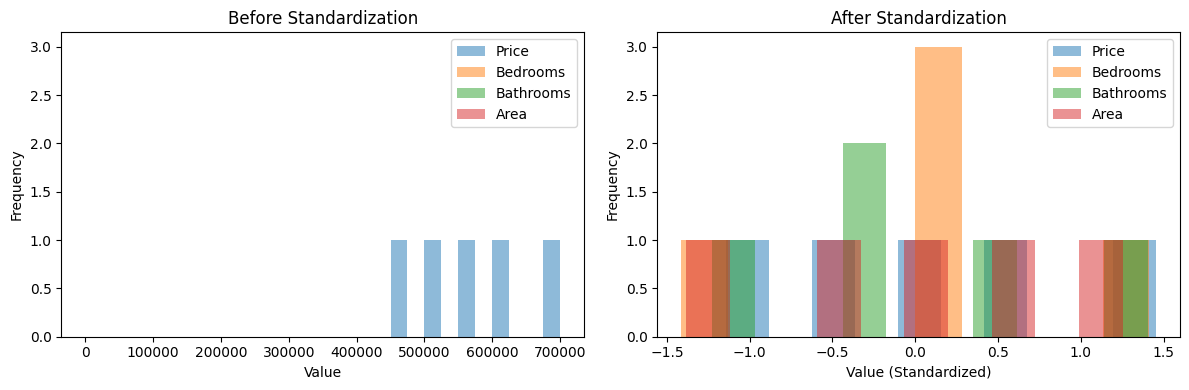

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with housing data
data = {
    'Price': [500000, 600000, 450000, 700000, 550000],
    'Bedrooms': [3, 4, 2, 3, 3],
    'Bathrooms': [2, 2.5, 1.5, 3, 2],
    'Area': [1500, 2000, 1200, 1800, 1600]
}

df = pd.DataFrame(data)

# Visualize the data before standardization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('Before Standardization')
plt.xlabel('Value')
plt.ylabel('Frequency')
for column in df.columns:
    plt.hist(df[column], bins=10, alpha=0.5, label=column)
plt.legend()

# Perform Standardization
df_standardized = (df - df.mean()) / df.std()

# Visualize the data after standardization
plt.subplot(1, 2, 2)
plt.title('After Standardization')
plt.xlabel('Value (Standardized)')
plt.ylabel('Frequency')
for column in df_standardized.columns:
    plt.hist(df_standardized[column], bins=10, alpha=0.5, label=column)
plt.legend()

plt.tight_layout()
plt.show()

The standardization process is performed using this line.

df_standardized = (df - df.mean()) / df.std()

It subtracts the mean (average) value of each column from the corresponding column's values and then divides by the standard deviation. This operation scales the data in such a way that it has a mean of 0 and a standard deviation of 1.


The resulting df_standardized DataFrame contains the standardized values of the original data, which can be used for various analysis or modeling tasks. Standardization is especially useful when you want to compare or combine features with different units or scales in a meaningful way.









In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with housing data
data = {
    'Price': [500000, 600000, 450000, 700000, 550000],
    'Bedrooms': [3, 4, 2, 3, 3],
    'Bathrooms': [2, 2.5, 1.5, 3, 2],
    'Area': [1500, 2000, 1200, 1800, 1600]
}

df = pd.DataFrame(data)

# Visualize the data before standardization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('Before Standardization')
plt.xlabel('Value')
plt.ylabel('Frequency')
for column in df.columns:
    plt.hist(df[column], bins=10, alpha=0.5, label=column)
plt.legend()

# Perform Standardization
df_standardized = (df - df.mean()) / df.std()

# Visualize the data after standardization
plt.subplot(1, 2, 2)
plt.title('After Standardization')
plt.xlabel('Value (Standardized)')
plt.ylabel('Frequency')
for column in df_standardized.columns:
    plt.hist(df_standardized[column], bins=10, alpha=0.5, label=column)
plt.legend()

plt.tight_layout()
plt.show()

## Styling a Dataframe

Lets style our DataFrame. We can use Panda's DataFrame styling capabilities to modify the appearance of a DataFrame when displayed in a Jupyter Notebook or similar. Specifically, it adds gridlines to the DataFrame for improved visual presentation.

In [ ]:
import pandas as pd

# Define the data
data = {
    'City': ['New York', 'New York', 'Los Angeles', 'Los Angeles'],
    'Neighborhood': ['Manhattan', 'Brooklyn', 'Hollywood', 'Beverly Hills'],
    'Year': [2020, 2020, 2020, 2020],
    'Price': [1500000, 800000, 1200000, 2500000],
    'House Type': ['Condo', 'Townhouse', 'Villa', 'Mansion']
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame with gridlines
df.style.set_table_styles([{
    'selector': 'th, td',
    'props': [('border', '1px solid black')]
}])

Here's a breakdown of what the code does:

1. df.style creates a Styler object associated with the DataFrame df. This object allows you to apply various formatting styles to the DataFrame for better visualization.

2. set_table_styles() is a method of the Styler object that allows you to define the styling properties for the table elements (headers and data cells).

3. The method is provided with a list containing a dictionary. This dictionary specifies the styling properties for the table elements using a CSS-like selector format:

4. 'selector': 'th, td' indicates that the styling properties should be applied to both table header cells (th) and table data cells (td).

5. 'props': [('border', '1px solid black')] specifies the styling property to add a border around the selected cells. In this case, it's adding a 1-pixel-wide solid black border.

When you execute this code, it modifies the visual representation of the DataFrame df by adding gridlines (borders) around the table header and data cells. This can make the DataFrame easier to read and interpret when displayed in notebook environments that support HTML/CSS styling.

# Exercises

## Exercise 1: Data Conversion

Given a pandas Series num_series with numerical values, convert it to a float using NumPy. Here an example series

    num_series = pd.Series([3, 7, 11, 22, 8])

## Exercise 2: Categorical Conversion

Assume you have a DataFrame df with a column 'Bedrooms' containing string values like "one," "two," etc. Convert these string values to numeric using a mapping dictionary (map).  Here is some data structure hints.

    'Bedrooms': ['three', 'four', 'two', 'three', 'three']

    bedroom_mapping = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}


## Exercise 3: Min-Max Scaling


Given a DataFrame df with numerical columns, perform Min-Max scaling on the columns to rescale the data between 0 and 1. Here's some starter code

In [ ]:
import pandas as pd

# Create a DataFrame with housing data
data = {
    'Price': [500000, 600000, 450000, 700000, 550000],
    'Bedrooms': [3, 4, 2, 3, 3],
    'Bathrooms': [2, 2.5, 1.5, 3, 2],
    'Area': [1500, 2000, 1200, 1800, 1600]
}

df = pd.DataFrame(data)
